In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [3]:
get_data_store_params_schema('smos')

In [4]:
store = new_data_store('smos')

In [5]:
store.get_open_data_params_schema()

In [6]:
JSON(store.list_data_ids())

<IPython.core.display.JSON object>

In [7]:
ds = store.open_data("SMOS-L2C-SM", time_range=("2023-05-01", "2023-05-02"))

In [8]:
ds

<xarray.Dataset>
Dimensions:            (time: 13, lat: 4032, lon: 8192, bnds: 2)
Coordinates:
  * lat                (lat) float64 88.57 88.53 88.48 ... -88.48 -88.53 -88.57
  * lon                (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time               (time) datetime64[us] 2023-05-01T01:54:46.500000 ... 2...
    time_bnds          (time, bnds) datetime64[us] dask.array<chunksize=(13, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    Chi_2              (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Chi_2_P            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    N_RFI_X            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    N_RFI_Y            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    RFI_Prob           (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Soil_Moisture      (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Soil_Moisture_DQX  (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>

In [9]:
ds.time

<xarray.DataArray 'time' (time: 13)>
array(['2023-05-01T01:54:46.500000', '2023-05-01T03:34:51.500000',
       '2023-05-01T05:14:55.500000', '2023-05-01T06:55:00.500000',
       '2023-05-01T07:44:59.000000', '2023-05-01T08:35:05.000000',
       '2023-05-01T10:15:09.000000', '2023-05-01T11:55:13.000000',
       '2023-05-01T14:25:18.000000', '2023-05-01T16:55:27.000000',
       '2023-05-01T18:35:32.000000', '2023-05-01T20:15:36.000000',
       '2023-05-01T21:55:40.500000'], dtype='datetime64[us]')
Coordinates:
  * time     (time) datetime64[us] 2023-05-01T01:54:46.500000 ... 2023-05-01T...
Attributes:
    standard_name:  time
    calendar:       proleptic_gregorian
    units:          seconds since 1970-01-01T00:00:00
    bounds:         time_bnds

In [10]:
ds.time_bnds

<xarray.DataArray 'time_bnds' (time: 13, bnds: 2)>
dask.array<open_dataset-e8ad9f5ff1567b78f9316e5774d62c9ftime_bnds, shape=(13, 2), dtype=datetime64[us], chunksize=(13, 2), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[us] 2023-05-01T01:54:46.500000 ... 2023-05-0...
    time_bnds  (time, bnds) datetime64[us] dask.array<chunksize=(13, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Attributes:
    calendar:  proleptic_gregorian
    units:     seconds since 1970-01-01T00:00:00

In [11]:
ds.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (time: 13, lat: 4032, lon: 8192)>
dask.array<open_dataset-e8ad9f5ff1567b78f9316e5774d62c9fSoil_Moisture, shape=(13, 4032, 8192), dtype=float32, chunksize=(1, 4032, 8192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.57 88.53 88.48 88.44 ... -88.48 -88.53 -88.57
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time     (time) datetime64[us] 2023-05-01T01:54:46.500000 ... 2023-05-01T...
Attributes:
    units:    m3 m-3

C:\Users\norma\AppData\Local\Temp\ipykernel_12628\676041400.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds.Soil_Moisture.isel(time=0).plot.imshow()


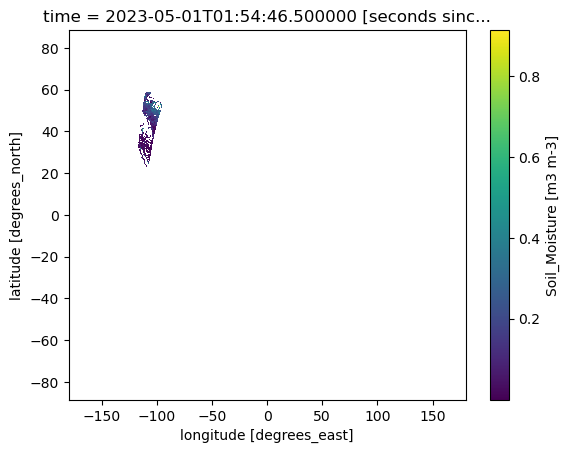

In [12]:
ds.Soil_Moisture.isel(time=0).plot.imshow()

Using the `lazy_load=True` setting forces lazy (deferred) loading of variable data of the SMOS L2 products.
Variable data is only loaded on demand. This saves CPU and memory when opening the data cube from the store.
However, this mode will not work with `dask.distributed` using multi-processes or using a cluster as 
indicated by the emitted warnings.

10 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


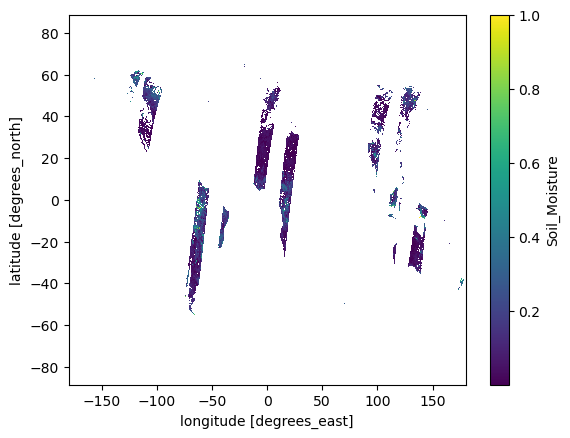

In [13]:
%%timeit -n 1 -r 1
ds.Soil_Moisture.mean("time").plot.imshow()

In [14]:
ds_rechunked = ds.chunk(dict(time=1, lat=4032 // 4, lon=8192 // 8))
ds_rechunked = ds_rechunked.drop('time_bnds')

In [15]:
ds_rechunked.to_zarr("smos.zarr", mode="w")

AttributeError: 'numpy.datetime64' object has no attribute 'year'